<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#read-data" data-toc-modified-id="read-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>read data</a></span></li></ul></li><li><span><a href="#preprocessing-for-topic-modeling" data-toc-modified-id="preprocessing-for-topic-modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>preprocessing for topic modeling</a></span></li><li><span><a href="#count" data-toc-modified-id="count-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>count</a></span></li><li><span><a href="#Topic-modeling" data-toc-modified-id="Topic-modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Topic modeling</a></span><ul class="toc-item"><li><span><a href="#make-tf" data-toc-modified-id="make-tf-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>make tf</a></span></li></ul></li><li><span><a href="#sklearn-LDA" data-toc-modified-id="sklearn-LDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>sklearn LDA</a></span></li></ul></div>

# SSEM X UNIST Health care

#### read data

In [1]:
import pandas as pd
import os,re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
%matplotlib inline
os.chdir('D:/myworks/18-1/ssem')

df=pd.read_csv('health_care_qa2.csv',index_col=0)
survey=pd.read_csv('healthcare_survey.csv',index_col=0)
visit_topic=pd.read_csv('visit_topic.csv',index_col=0)

In [2]:
survey=pd.read_csv('healthcare_survey.csv',index_col=0)

### preprocessing for topic modeling

In [3]:
# 정규표현식을 사용한 노이즈 제거
def delete_noise(text):
    noise = re.compile('[\t\n\r\xa0]')                
    result=noise.sub(' ',str(text))                   #  \t, \n, \r, \xa0 제거 
    result=re.sub(' +<.*?>',' ',result)               # 특수문자 제거
    result=re.sub(r'[^\w]',' ',result)                # 특수문자 제거
    result=re.sub(' +',' ',result).strip()            # 여러 공백(multi space)을 하나의 공백으로 줄이기
    return result

In [1]:
doc_name=['권용석','배성범','신재현','최인광','이재원','김윤석','신상헌']



In [4]:
# 도박중독 및 행위중독, 기업/직장인 정신건강, 대인기피, 불안/우울장애, 치매, 수면장애
# 심층심리상담
# 심리상담, 우울증, 공황장애, 사회불안증, 강박증, 수면장애
# 정신분석, 성의학 - 우울증, 불면증, 불안장애, 조현병, 알코올 의존, 정신과 상담, 성 관련 심리상담, 성치료, 성적 소수자(LGBTAIQ) 상담, 가족 및 부부치료, 심리치료
# 인터넷중독, 게임중독, 스마트폰중독, ADHD, 성인ADHD, 인지장애, 뇌자극술
# 우울증, 불안증, 화병, 인지기능 감퇴, 대인관계 문제, 치매, ADHD, 틱 증후군, 수면장애/하지불안증후군, 강박증, 조현병, 조울증
# 피로

# --> 도박/중독, 대인관계/대인기피, 수면장애/피로, 성관련, 가족/부부, 불안/우울

# answer preprocessing
doc_name=['권용석','배성범','신재현','최인광','이재원','김윤석','신상헌']

for i in doc_name:
    df.answer=df.answer.apply(lambda x: x.split(i+' 입니다.')[-1])

In [5]:
from eunjeon import Mecab


mc=Mecab()

def get_nouns(doc):
    noun_list=mc.nouns(doc)
    noun_list=[noun for noun in noun_list if len(noun)>1]
    return ' '.join(noun_list)

In [6]:
# survey 문제 없는 사람들 제거
s_r_dict=dict(zip(np.unique(survey.results),list(range(32))))
survey['dic']=survey.results.map(s_r_dict)

#survey=survey.query('dic!=10').reset_index(drop=True)

survey.shape

(811, 3)

In [13]:
a=survey.query('dic==10').text.apply(lambda x: len(x))
b=survey.query('dic!=10').text.apply(lambda x: len(x))

In [6]:
# Q&A 
df.question=df.question.apply(delete_noise)
df.question=df.question.apply(get_nouns)

df.answer=df.answer.apply(delete_noise)
df.answer=df.answer.apply(get_nouns)

# survey
survey.text=survey.text.apply(delete_noise)
survey.text=survey.text.apply(get_nouns)

survey.results=survey.results.apply(delete_noise)
survey.results=survey.results.apply(get_nouns)

In [ ]:
plt.plot(lg.index, lg['Adj Close'], label='LG Electronics')
plt.plot(samsung.index, samsung['Adj Close'], label='Samsung Electronics')

plt.legend(loc='upper right')

Text(0.5,0,'Generated text length')

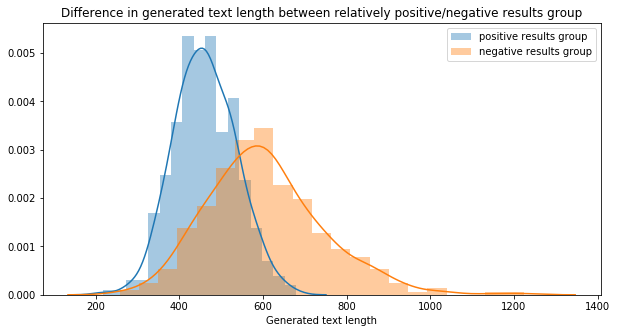

In [34]:
plt.figure(figsize=(10,5))
f=sns.distplot(a,label='positive results group')
f.set_title('Difference in generated text length between relatively positive/negative results group',)
sns.distplot(b,label='negative results group')
plt.legend(loc='upper right')
plt.xlabel('Generated text length')
#plt.title('Difference in generated text length between relatively positive/negative results group')

In [ ]:
plt.xlabel

### count

### Topic modeling

#### make tf

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vec=CountVectorizer(max_df=0.95, min_df=2)
tf_model=tf_vec.fit(df.question)

def make_tf(documnet_list,tf_model):
    tf_feature_names=tf_vec.get_feature_names()
    tf=tf_model.transform(documnet_list)
    print('Term frequency matrix shape :',tf.shape)
    return tf,tf_feature_names

In [130]:
# 지식인 Question으로 TF 모델 생성
tf_matrix,tf_feature_names=make_tf(df.question,tf_model)

Term frequency matrix shape : (2577, 4677)


### sklearn LDA

In [135]:
%%time

# LDA 모델 생성
n_topics = 6

# Run LDA
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=30,
                                learning_method='online',
                                random_state=0, n_jobs=4).fit(tf_matrix)

Wall time: 20.6 s


In [156]:
q=[]
s=[]
for i in range(2,15):
    
    # LDA 모델 생성
    n_topics = i

    # Run LDA
    lda = LatentDirichletAllocation(n_components=n_topics, 
                                    max_iter=100,
                                    learning_method='online',
                                    random_state=0, n_jobs=4).fit(tf_matrix)

    q.append(lda.perplexity(tf_matrix))
    s.append(lda.perplexity(tf_survey))

In [157]:
print('done')

done


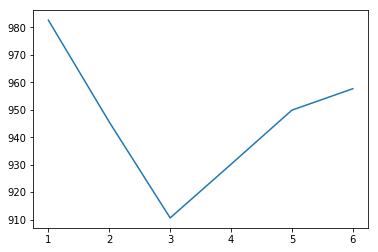

In [151]:
plt.plot(range(1,7),rr)

In [152]:
rr

[982.535393682647,
 945.4943430603587,
 910.6200267667665,
 930.1402438124263,
 949.8277164463668,
 957.6224507403756]

In [148]:
r

[910.6200267667665,
 930.1402438124263,
 949.8277164463668,
 957.6224507403756,
 935.6764710164775,
 936.2170659428087,
 953.1137085607453,
 949.0924481274378,
 959.0454083321376]

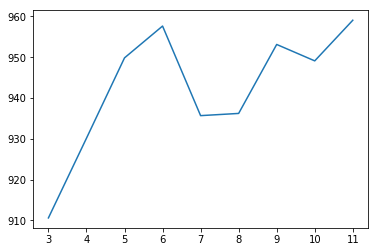

In [147]:
plt.plot(range(3,12),r)

In [141]:
print('done')

done


In [139]:
lda.perplexity(tf_matrix)

960.7684894534053

In [ ]:
# document 별로 topic 구하기
def get_document_topic(lda_model,tf_model,top_n_topic):
    doc_topic = lda_model.transform(tf_model)
    
    topic_most_pr_n_l=[]
    prob_l=[]
    
    for n in range(tf_model.shape[0]):
        topic_most_pr_n=doc_topic[n].argsort()[-top_n_topic:][::-1] #topic_most_pr = doc_topic[n].argmax()
        topic_most_pr_n_l.append(list(topic_most_pr_n))   
    
        prob=doc_topic[n][topic_most_pr_n]
        prob_l.append(list(prob))
        if n<5:            
            print('doc :{0}, topic: {1}, prob: {2}'
                  .format(n,topic_most_pr_n,prob))
        
    return topic_most_pr_n_l,prob_l

In [153]:
# Survey text TF 만들기
tf_survey,tf_survey_feature_names=make_tf(survey.text,tf_model)

Term frequency matrix shape : (440, 4677)


In [ ]:
# how many topic?
k=6

print('Q&A data topic modeling \n')
q_topic,q_topic_prob=get_document_topic(lda,tf,k)
print('\nsurvey data topic modeling \n')
survey_topic,survey_topic_prob=get_document_topic(lda,tf_survey,k)

#pd.Series(topic_label_list).astype(str).value_counts()[:10]

# sort한 토픽 리스트 생성
q_topic_sorted=[sorted(i) for i in q_topic]
s_topic_sorted=[sorted(i) for i in survey_topic]

print('\nunique combination of Survey text topics label :',len(pd.Series(s_topic_sorted).astype(str).value_counts()))
print('unique combination of Naver Question topics label :',len(pd.Series(q_topic_sorted).astype(str).value_counts()))

In [ ]:
# 그냥 확률 값으로 원핫 인코딩 하기
prob_array=lda.transform(tf_matrix)

def make_one_hot_vector(a):
    result=np.where(a==np.max(a),1,0)
    return result

one_hot_qlabel=pd.Series(prob_array).apply(make_one_hot_vector)
print(one_hot_qlabel.shape)

In [136]:
# 전체
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
엄마 아빠 저희 병원 입원 가족 동생 언니 부모 정신
Topic 1:
시간 정도 하루 아침 중독 피곤 불면증 복용 수면 운동
Topic 2:
치료 정신 병원 상담 검사 게임 의사 처방 약물 정신과
Topic 3:
생각 사람 친구 증상 정도 불안 때문 스트레스 이상 학교
Topic 4:
벌레 리스 화장실 사고 페달 결벽증 샤워 버스 사진 냄새
Topic 5:
아버지 어머니 복용 아이 저희 남편 결혼 신랑 애기 부작용


# Doc2Vec

질문 : BFI(5가지 성격 : 외향성 등 ), 의사소통, 스트레스, 우울증, 자살 -> 5개  
답변 : 스트레스, 우울, 자살  -> 3개

In [24]:
from gensim.models.doc2vec import LabeledSentence, Doc2Vec, TaggedDocument

# labeled sentence 생성
def make_tagged_documnet(documnet,label):
    doc=[TaggedDocument(text, [label]) for text, label in list(zip(documnet,label))]
    print('The number of tagged documnet :',len(doc))
    return doc

# doc2vec modeling
def modeling_doc2vec(document,label):
    doc=make_tagged_documnet(document,label)
    model=Doc2Vec(doc, dm=0, dm_mean=0, alpha=0.1, vector_size= 300, window = 5, min_count = 1, workers=4, seed = 42, epochs=7, hs=1,negative=3)
    return model

D:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [36]:
# 
answer_list=df.answer.apply(lambda x: x.split(' '))
question_list=df.question.apply(lambda x : x.split(' '))

# q_topic
#topic_label_list=pd.Series(q_topic_sorted).astype(str)

In [1]:
model_one=modeling_doc2vec(question_list,one_hot_qlabel)
model_two=modeling_doc2vec(answer_list,topic_label_list)

In [335]:
# apply
survey.text=survey.text.apply(lambda x: x.split(' '))
survey.results=survey.results.apply(lambda x : x.split(' '))

In [360]:
# get similar movie code (x)
def get_similar_code(model,query):
    model.random.seed(23)
    new_vector = model.infer_vector(query,alpha=0.001)
    sims = model.docvecs.most_similar([new_vector],topn=5)
    sim_code = [code for code, sim in sims]
    return sim_code

In [361]:
text_results=[get_similar_code(model_one,i) for i in survey.text]
answer_results=[get_similar_code(model_two,i) for i in survey.results]

#survey['text_results'] = survey.apply(lambda x: get_similar_code(model_one, x['text']), axis=1)
#survey['answer_results'] = survey.apply(lambda x: get_similar_code(model_two, x['results']), axis=1)

In [362]:
def calculate_survey_similarity(text_results,answer_results):
    results=[len(set(text_results[i]) & set(answer_results[i]))/5 for i in range(survey.shape[0])]
    return sum(results)/len(results)

In [363]:
calculate_survey_similarity(text_results,answer_results)

0.3334155363748453

In [ ]:
# 유사 영화 코드를 찾고, 정확도를 구함 
# get similar movie code (x)
def get_similar_code(query):
    model.random.seed(23)
    new_vector = model.infer_vector(query,alpha=0.001)
    sims = model.docvecs.most_similar([new_vector],topn=1)
    sim_code = [code for code, sim in sims]
    return sim_code

def get_acc(test):
    sim_code=list(test.q_phrase.apply(get_similar_code))
    code_list=list(test.code)
    acc=[code_list[i] in sim_code[i] for i in range(len(sim_code))]
    return (sum(acc)/len(acc))

In [ ]:
# 학습한 모델에서 트레인 데이터와 테스트 데이터의 embeded vector를 구하는 함수입니다
def get_infer_vector():   
    train_list=list(train.tagged)
    test_list=list(test.tagged)
    
    train_vec=[]
    test_vec=[]
    
    for i in train_list:
        model.random.seed(23)
        train_vec.append(model.infer_vector(i,alpha=0.001))
    for j in test_list:
        model.random.seed(23)
        test_vec.append(model.infer_vector(j,alpha=0.001))
    
    print('train vector len :',len(train_vec))
    print('test vector len :',len(test_vec))
    
    return train_vec,test_vec

In [22]:
import tensorflow as tf

tf.enable_eager_execution()

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [133]:
tf.set_random_seed(777)  # reproducibility

#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 300])
Y = tf.placeholder(tf.float32, [None, 6])

In [ ]:
# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([300, 150]))
b1 = tf.Variable(tf.random_normal([150]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([150, 150]))
b2 = tf.Variable(tf.random_normal([150]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([150, 6]))
b3 = tf.Variable(tf.random_normal([6]))
hypothesis = tf.matmul(L2, W3) + b3

In [ ]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# define cost/loss & optimizer
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

In [ ]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# TEST

In [ ]:
class preprocessing_text:
    def delete_noise(self,doc):
        noise = re.compile('[\t\n\r\xa0]')                
        result=noise.sub(' ',str(doc))                   #  \t, \n, \r, \xa0 제거 
        result=re.sub(' +<.*?>',' ',result)               # 특수문자 제거
        result=re.sub(r'[^\w]',' ',result)                # 특수문자 제거
        result=re.sub(' +',' ',result).strip()            # 여러 공백(multi space)을 하나의 공백으로 줄이기
        return result
    
    def get_nouns(self,doc):
        noun_list=mc.nouns(doc)
        noun_list=[noun for noun in noun_list if len(noun)>1]
        return ' '.join(noun_list)

word cloud

In [ ]:
from collections import Counter
# noun list 
n=df.question.apply(lambda x: x.split(' '))
# make flat list
n_l=[j for i in n for j in i]

# coount
n_count=Counter(n_l)
print('The number of unique nouns in question : ',len(n_count))

In [ ]:
from wordcloud import WordCloud

# font path 설정
path = "c:/Windows/Fonts/malgun.ttf"
wc=WordCloud(font_path=path, width=800, height=800).generate_from_frequencies(n_count)

plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

gensim lda

In [ ]:
from gensim.models.ldamodel import LdaModel
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

data_question=list(df.question.apply(lambda x : x.split(' ')))

# Create Dictionary
id2word = corpora.Dictionary(data_question)

# Create Corpus
texts = data_question

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

n_topics=6
#prior=[0.36046512,0.05232558,0.34302326,0.21511628,0.00000000,0.02906977]

# Build LDA model
lda_model = LdaModel(corpus=corpus,
           id2word=id2word,
           num_topics=n_topics, 
           random_state=100,
           update_every=1,
           chunksize=100,
           passes=10,
           alpha=prior,
           per_word_topics=True)

lda_model[id2word.doc2bow(df.question[10].split(' '))][0]

test_lda = LdaModel(corpus,num_topics=5, id2word=id2word)
test_lda[dictionary.doc2bow('human system')]

read

In [ ]:
col=['indexx', 'month','index','gender', 'undergrad',   'major', 'address', 'reason', 
     'topic1', 'topic2', 'topic3', 'medicne', 
     'PHQ_9_all', 'PHQ_9_9', 'GAD_7', 'PSQI_all', 
     'PHQ_9_all_after','PHQ_9_9_after', 'GAD_7_after', 'PSQI_all_after']

data=pd.read_excel('2018년 상담사례_데이터.xlsx',header=4).reset_index()
data.columns=col
data=data.drop(['indexx','index'],axis=1)

In [ ]:
from gensim.models.doc2vec import LabeledSentence, Doc2Vec, TaggedDocument

# labeled sentence 생성
def make_tagged_documnet(documnet,label):
    doc=[TaggedDocument(text, [label]) for text, label in list(zip(documnet,label))]
    print('The number of tagged documnet :',len(doc))
    return doc

# doc2vec modeling
def modeling_doc2vec(document,label):
    doc=make_tagged_documnet(document,label)
    # doc2vec parameter
    #model=Doc2Vec(doc, dm=0, dm_mean=0, alpha=0.1, vector_size= 300, window = 5, min_count = 1, workers=4, seed = 42, epochs=7, hs=1,negative=3) old version
    model=Doc2Vec(doc, dm=0, alpha=0.1, vector_size= 300, window =1, min_count = 1, workers=4, seed = 42, epochs=7,negative=3,dm_concat=0)
    return model

# 학습한 모델에서 트레인 데이터와 테스트 데이터의 embeded vector를 구하는 함수입니다
def get_infer_vector(model,train,test):   
    train_vec=[]
    test_vec=[]   
    for i in train:
        model.random.seed(23)
        train_vec.append(model.infer_vector(i,alpha=0.001))
    for j in test:
        model.random.seed(23)
        test_vec.append(model.infer_vector(j,alpha=0.001))
    
    print('train vector len :',len(train_vec))
    print('test vector len :',len(test_vec))
    return train_vec,test_vec

# doc2vec modeling
model=modeling_doc2vec(question_list,q_label)

# doc2vec modeling
model=modeling_doc2vec(survey_list,s_label)

all_list=pd.concat([question_list,survey_list])
all_label=pd.concat([q_label,s_label])

# doc2vec modeling
model=modeling_doc2vec(all_list,all_label)

##### get infer vector

# get infer vector
q_vec,s_vec=get_infer_vector(model,question_list,survey_list)